In [1]:
import numpy as np
import os,sys
sys.path.append(os.path.realpath('../lib'))
from data_loader import build_noisy_circular_graph
import matplotlib.pyplot as plt
from graph import graph_colors,draw_rel,draw_transp,find_thresh,sp_to_adjency
import networkx as nx
from FGW import fgw_barycenters

In [2]:
np.random.seed(30)
X0=[]
for k in range(9):
    X0.append(build_noisy_circular_graph(np.random.randint(15,25),with_noise=True,structure_noise=True,p=3))

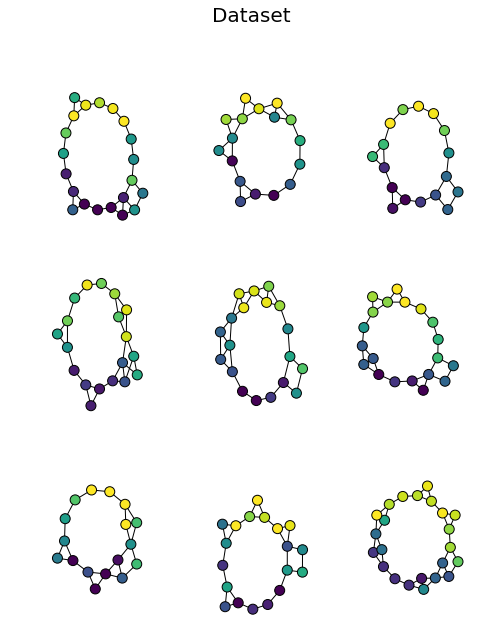

In [3]:
plt.figure(figsize=(8,10))
for i in range(len(X0)):
    plt.subplot(3,3,i+1)
    g=X0[i]
    pos=nx.kamada_kawai_layout(g.nx_graph)
    nx.draw(g.nx_graph,pos=pos,node_color = graph_colors(g.nx_graph,vmin=-1,vmax=1),with_labels=False,node_size=100)
plt.suptitle('Dataset',fontsize=20)
plt.show()

In [4]:
Cs=[x.distance_matrix(force_recompute=True,algo='scipy',method='shortest_path') for x in X0]
Cs=[c for c in Cs]
ps=[np.ones(len(x.nodes()))/len(x.nodes()) for x in X0]
Ys=[x.values() for x in X0]
lambdas=np.array([np.ones(len(Ys))/len(Ys)]).ravel()
sizebary=15
init_X=np.repeat(sizebary,sizebary)

In [5]:
D1,C1,log=fgw_barycenters(sizebary,Ys,Cs,ps,lambdas,alpha=0.95,init_X=init_X)

In [6]:
bary=nx.from_numpy_matrix(sp_to_adjency(C1,threshinf=0,threshsup=find_thresh(C1,sup=100,step=100)[0]))
for i in range(len(D1)):
    bary.add_node(i,attr_name=float(D1[i]))

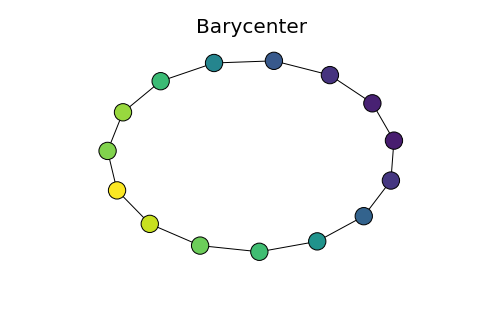

In [7]:
pos = nx.kamada_kawai_layout(bary)
nx.draw(bary,pos=pos,node_color = graph_colors(bary,vmin=-1,vmax=1),with_labels=False)
plt.suptitle('Barycenter',fontsize=20)
plt.show()